In [1]:
import cv2
import os
import random
import matplotlib.pylab as plt
from glob import glob
import pandas as pd
import numpy as np

In [2]:
# ../input/
PATH = os.path.abspath(os.path.join('..', 'Medical_Xray_CNN'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "img", "images")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Load labels
labels = pd.read_csv('Data_Entry_2017.csv')

In [3]:
labels['Finding Labels']

0                                         Cardiomegaly
1                               Cardiomegaly|Emphysema
2                                Cardiomegaly|Effusion
3                                           No Finding
4                                               Hernia
5                                               Hernia
6                                               Hernia
7                                  Hernia|Infiltration
8                                               Hernia
9                                               Hernia
10                                              Hernia
11                                              Hernia
12                                         Mass|Nodule
13                                          No Finding
14                                          No Finding
15                                          No Finding
16                                          No Finding
17                                          No Finding
18        

/home/felipe/Medical_Xray_CNN/img/images/00028902_005.png
/home/felipe/Medical_Xray_CNN/img/images/00028366_001.png
/home/felipe/Medical_Xray_CNN/img/images/00029396_000.png


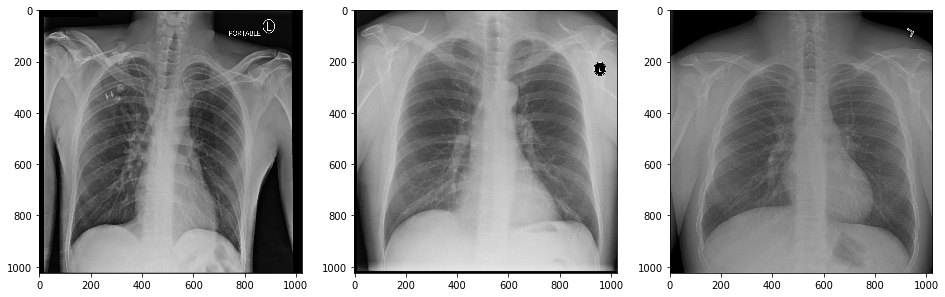

In [4]:
r = random.sample(images, 3)
plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0]))
print(r[0])
print(r[1])
print(r[2])

plt.subplot(132)
plt.imshow(cv2.imread(r[1]))

plt.subplot(133)
plt.imshow(cv2.imread(r[2]))
plt.show()

In [5]:
def select_images():
    disease = 'Pneumothorax'
    WIDTH = 224
    HEIGHT = 224
    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        # Read and resize image
        if disease in finding:
            full_size_image = cv2.imread(img)
            resized = cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
            path = './img/pneumothorax_img_224'
            cv2.imwrite(os.path.join(path , '{}'.format(base)), resized)
    return

In [6]:
select_images()

In [7]:
def select_images2():
    disease = 'No Finding'
    WIDTH = 224
    HEIGHT = 224
    for img in images:
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]
        # Read and resize image
        if disease in finding:
            full_size_image = cv2.imread(img)
            resized = cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
            path = './img/no_findings_224'
            cv2.imwrite(os.path.join(path , '{}'.format(base)), resized)
    return

In [8]:
select_images2()